In [5]:
# Import required function
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
from pycbc import frame
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_fd_waveform
from pycbc.filter import highpass_fir, matched_filter, match
%matplotlib inline

strain = frame.read_frame('../../bhhunterdata/O1Data/H-H1_LOSC_4_V1-1126076416-4096.gwf', 'H1:LOSC-STRAIN')

In [6]:
psd = strain.psd(4)
psd = interpolate(psd, strain.delta_f)
psd = inverse_spectrum_truncation(psd, strain.sample_rate * 4, low_frequency_cutoff=15)

In [7]:
hp, _ = get_fd_waveform(approximant="IMRPhenomD",
                        mass1=37.06560803,
                        mass2=33.37044403,
                        spin1z=0.10151033,
                        spin2z=-0.21668832,
                        f_lower=20,
                        delta_f=strain.delta_f)

####################
####################

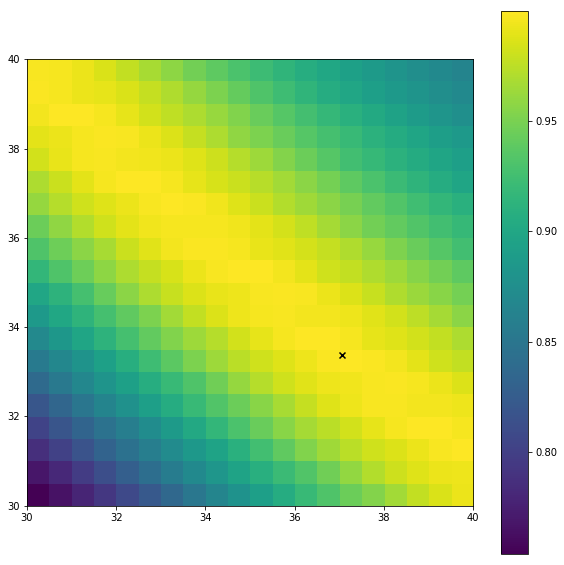

In [8]:
masses1 = np.linspace(30, 40, num=20)
masses2 = np.linspace(30, 40, num=20)
mm = np.zeros((len(masses1), len(masses2)), dtype=np.float64)

print('#'*len(masses1))
for i in range(len(masses1)):
    mass1 = masses1[i]
    for j in range(len(masses2)):
        mass2 = masses2[j]
        hp2, _ = get_fd_waveform(approximant="IMRPhenomD",
                                mass1=mass1,
                                mass2=mass2,
                                spin1z=0.10151033,
                                spin2z=-0.21668832,
                                f_lower=20,
                                delta_f=strain.delta_f)
        hp2.resize(len(hp))
        matched = match(hp, hp2, psd=psd, low_frequency_cutoff=20)
        mm[i, j] = matched[0]
    print('#', end='')

plt.figure(figsize=[10, 10])
plt.imshow(mm.T, origin='lower', extent=[masses1[0], masses1[-1], masses2[0], masses2[-1]])
plt.colorbar()
plt.scatter(37.06560803, 33.37044403, c='black', marker='x')

####################
####################

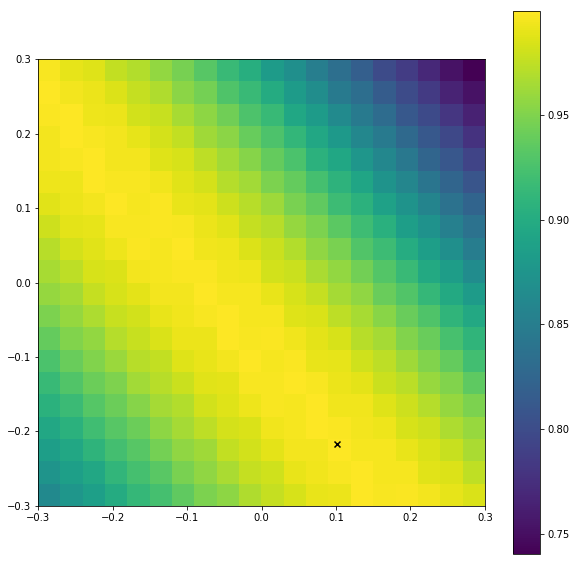

In [10]:
spins1 = np.linspace(-0.3, 0.3, num=20)
spins2 = np.linspace(-0.3, 0.3, num=20)
sm = np.zeros((len(spins1), len(spins2)), dtype=np.float64)


print('#'*len(spins1))
for i in range(len(spins1)):
    spin1 = spins1[i]
    for j in range(len(spins2)):
        spin2 = spins2[j]
        hp2, _ = get_fd_waveform(approximant="IMRPhenomD",
                                mass1=37.06560803,
                                mass2=33.37044403,
                                spin1z=spin1,
                                spin2z=spin2,
                                f_lower=20,
                                delta_f=strain.delta_f)
        hp2.resize(len(hp))
        matched = match(hp, hp2, psd=psd, low_frequency_cutoff=20)
        sm[i, j] = matched[0]
    print('#', end='')

plt.figure(figsize=[10, 10])
plt.imshow(sm.T, origin='lower', extent=[spins1[0], spins1[-1], spins2[0], spins2[-1]])
plt.colorbar()
plt.scatter(0.10151033, -0.21668832, c='black', marker='x')